# Level 1

 ## Task 1: Data Cleaning and Preprocessing

### Step 1: Import libraries

In [52]:
import pandas as pd

### Step 2: Load dataset

In [53]:
data = pd.read_csv(Path)
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Step 3: Identify and handle missing values

In [54]:
print("\nInfo before standardization:")
print(data.info())
print("\nMissing values before handling:")
print(data.isnull().sum())

# The output of data.info() and data.isnull().sum() shows that there are no missing values (0 NaN in all columns)
# This means we do not need to clean missing data


Info before standardization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values before handling:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### Step 4: Remove duplicate rows

In [55]:
print("Number of duplicate rows before removal:", data.duplicated().sum())

# Drop duplicate rows
data.drop_duplicates(inplace=True)

print("Number of duplicate rows after removal:", data.duplicated().sum())

Number of duplicate rows before removal: 3
Number of duplicate rows after removal: 0


### Step 5: Standardize inconsistent data formats

In [56]:
print("\nData types after standardization:")
print(data.dtypes)

# No data type conversion is needed here


Data types after standardization:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [57]:

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Task 2: Exploratory Data Analysis (EDA)

### Step 1: Summary Statistics

In [58]:
print("\nSummary Statistics:")
print(data.describe())
print("\nMedian values:")
print(data.median(numeric_only=True))
print("\nMode values:")
print(data.mode().iloc[0])


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Median values:
sepal_length    5.8
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64

Mode values:
sepal_length           5.0
sepal_width            3.0
petal_length           1.4
petal_width            0.2
species         versicolor
Name: 0, dtype: object


### Step 2: Data Visualization

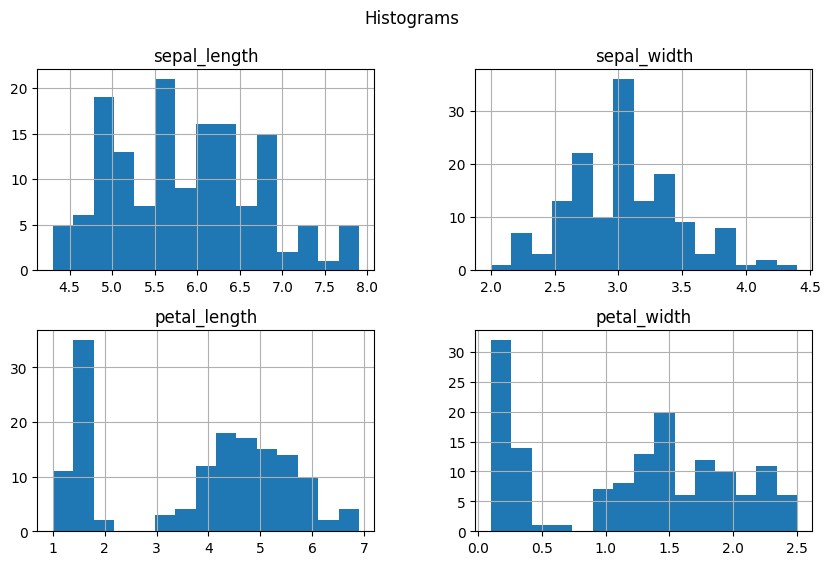

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
data.hist(figsize=(10, 6), bins=15)
plt.suptitle("Histograms")
plt.show()

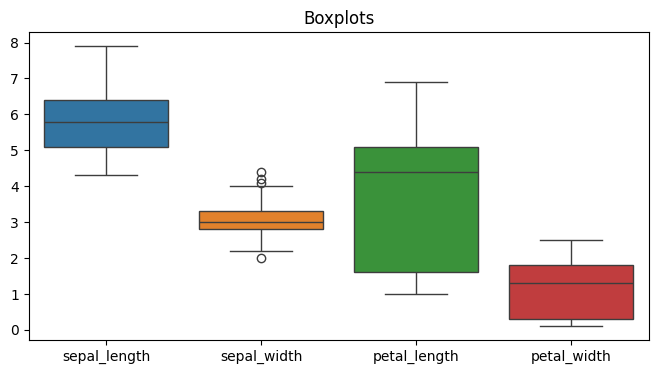

In [60]:
# Boxplots
plt.figure(figsize=(8, 4))
sns.boxplot(data=data.drop(columns="species"))
plt.title("Boxplots")
plt.show()

<Figure size 600x400 with 0 Axes>

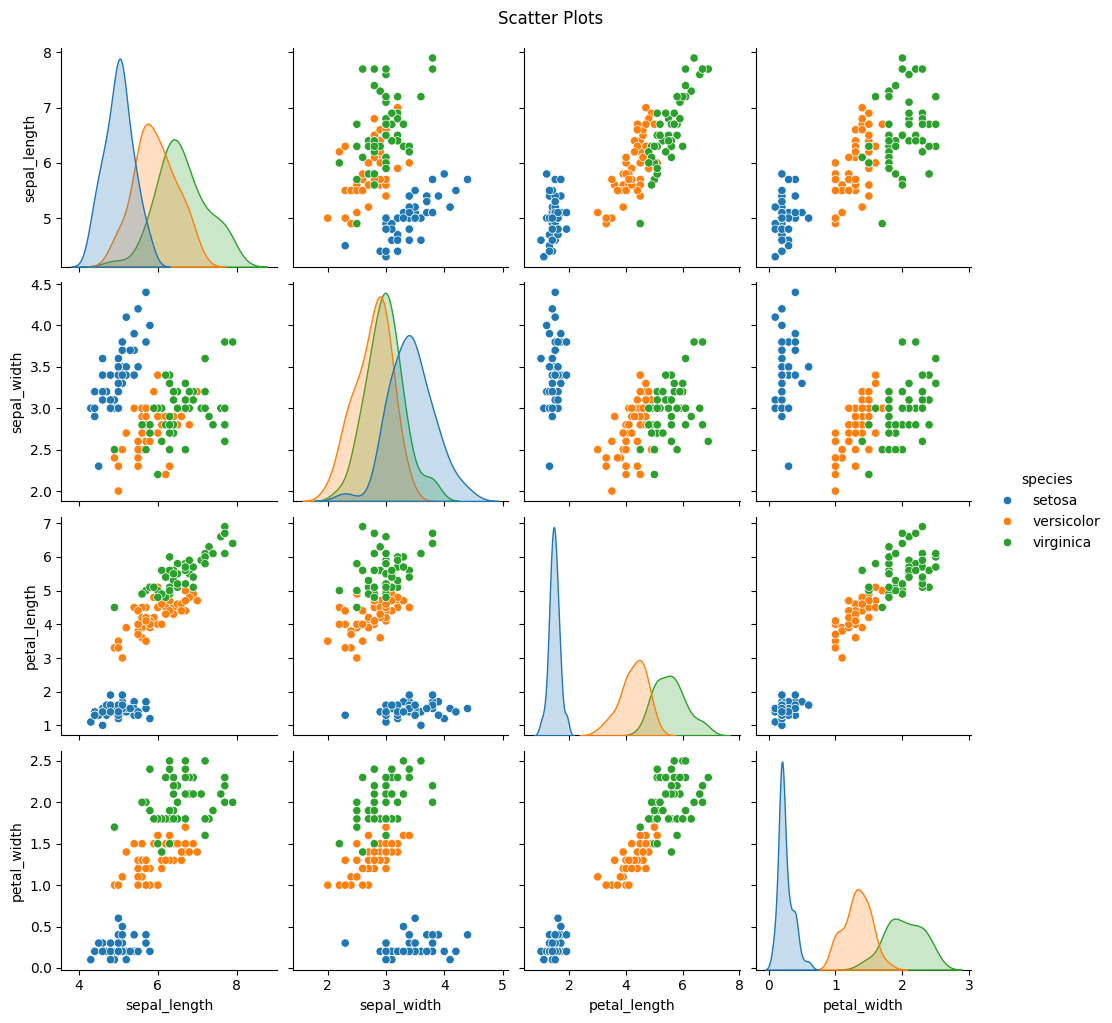

In [61]:
# Scatter
plt.figure(figsize=(6, 4))
sns.pairplot(data, hue="species")
plt.suptitle("Scatter Plots", y=1.02)
plt.show()


### Step 3: Correlation Analysis


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109321      0.871305     0.817058
sepal_width      -0.109321     1.000000     -0.421057    -0.356376
petal_length      0.871305    -0.421057      1.000000     0.961883
petal_width       0.817058    -0.356376      0.961883     1.000000




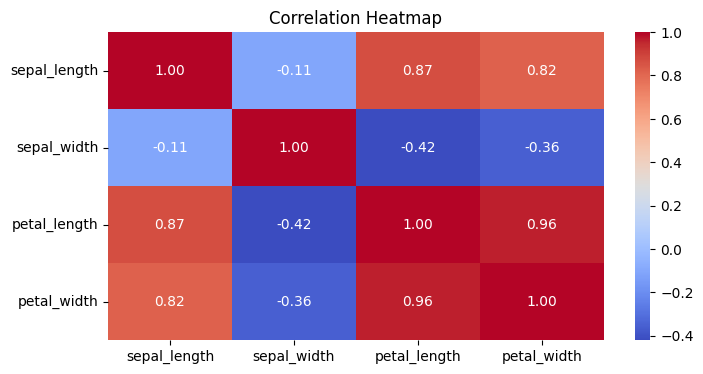

In [62]:
corr = data.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(corr)

print("\n")
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Level 2

## Task 1 : Regression Analysis

In [63]:
# Stock Prices:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [64]:
# load dataset
data = pd.read_csv(Path)

print(data.head())

  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391


In [65]:
# Identifying the shape of the data.
data.shape

(497472, 7)

In [66]:
# Dropping the variables we do not need.
data = data.drop(columns='symbol',axis = 1)
# Printing the dataset to review the remaining variables.
data.head()

,date,open,high,low,close,volume
0,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [67]:
#are there any duplicate values?
data.duplicated().sum().any()

np.False_

In [68]:
# checking for True or False for any nulls in the dataset
print("Number of null values per column:")
print(data.isnull().sum())

Number of null values per column:
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [69]:
# remove the null values
data.dropna(inplace=True)
print("\nNumber of null values after dropping rows with nulls:")
print(data.isnull().sum())


Number of null values after dropping rows with nulls:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [70]:
#checking & Reviewing DataFram Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497461 entries, 0 to 497471
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    497461 non-null  object 
 1   open    497461 non-null  float64
 2   high    497461 non-null  float64
 3   low     497461 non-null  float64
 4   close   497461 non-null  float64
 5   volume  497461 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [71]:
#Overview descriptive statistic for data
data.describe()

,open,high,low,close,volume
count,497461.000000,497461.000000,497461.000000,497461.000000,4.974610e+05
mean,86.352275,87.132717,85.552616,86.368586,4.253695e+06
std,101.471228,102.312340,100.571231,101.471516,8.232210e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,41.690000,42.090000,41.280000,41.700000,1.080183e+06
50%,64.970000,65.560000,64.357400,64.980000,2.085013e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271999e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [72]:
# checking the .corr function to see the correlations between variables. Closest to one.
# Exclude the 'date' column as it is not numerical
print(data.drop(columns=['date']).corr())

            open      high       low     close    volume
open    1.000000  0.999941  0.999928  0.999876 -0.148724
high    0.999941  1.000000  0.999905  0.999938 -0.148345
low     0.999928  0.999905  1.000000  0.999941 -0.149285
close   0.999876  0.999938  0.999941  1.000000 -0.148839
volume -0.148724 -0.148345 -0.149285 -0.148839  1.000000


In [73]:
# Input and output variables
x = data[['open','high','low','volume']].values
y = data['close'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [74]:
# checking the shape for train data
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (397968, 4)
Test: (99493, 4)


In [75]:
# Training the Model Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

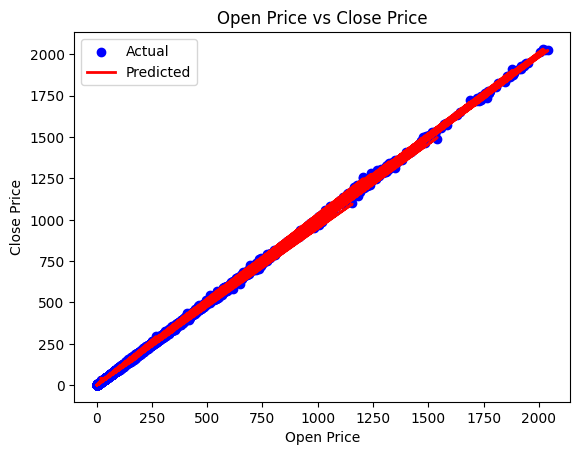

In [76]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 0], y_pred, color='red', label='Predicted',lw = 2)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open Price vs Close Price')
plt.legend()
plt.show()

In [77]:
# Interpret the coefficients and evaluate the model
print("Coefficients:", model.coef_)
print("\nIntercept:", model.intercept_)
print("\nR-squared (Training Data):", model.score(X_train, y_train))
print("\nMean Squared Error (Test Data):", mean_squared_error(y_test, y_pred))
print("\nR-squared (Test Data):", r2_score(y_test, y_pred))

Coefficients: [-5.52482240e-01  7.83039848e-01  7.69751580e-01  1.13332788e-10]

Intercept: -0.006795989404523084

R-squared (Training Data): 0.9999512577984386

Mean Squared Error (Test Data): 0.5216685717575149

R-squared (Test Data): 0.9999501102050854


## Task 2: Time Series Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Step 1 : Loading data

In [ ]:
df = pd.read_csv(Path)

df.head()

In [ ]:
df.dtypes

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date', inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)
print("\nNumber of null values after dropping rows with nulls:")
print(df.isnull().sum())

In [ ]:
df.duplicated().sum()

In [ ]:
ts = df['close']

 ### Step 2 : Data visualization

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(ts, label='Close Price', color='blue')
plt.title('Time Series - Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Step 3 : Operations on time series

In [ ]:
# Resample (monthly mean)
monthly = ts.resample('ME').mean()

plt.figure(figsize=(12,3))
plt.plot(monthly, label='Monthly Average', color='orange')
plt.title('Monthly Resampled Time Series')
plt.legend()
plt.show()

# Moving average smoothing (30-day)
ts_ma = ts.rolling(window=30).mean()

plt.figure(figsize=(12,3))
plt.plot(ts, label='Original', alpha=0.6)
plt.plot(ts_ma, label='30-Day MA', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()


### Step 4 : Checking the stationarity of this time series

In [44]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def safe_adf_test(series, sample_size=2000):
    """
    Runs ADF test on a sample of the series (default: last 2000 points)
    to avoid memory/CPU overload.
    """
    # Convert to numeric
    series = pd.to_numeric(series, errors='coerce').dropna()

    # Limit size
    if len(series) > sample_size:
        print(f"⚠️ Series too large ({len(series)} rows). Using last {sample_size} rows only.")
        series = series.iloc[-sample_size:]

    # Run ADF
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

    if result[1] <= 0.05:
        print("✅ Series is stationary")
    else:
        print("❌ Series is NOT stationary")


safe_adf_test(df['close'])


⚠️ Series too large (497461 rows). Using last 2000 rows only.
ADF Statistic: -12.93604457588472
p-value: 3.616157626160565e-24
✅ Series is stationary


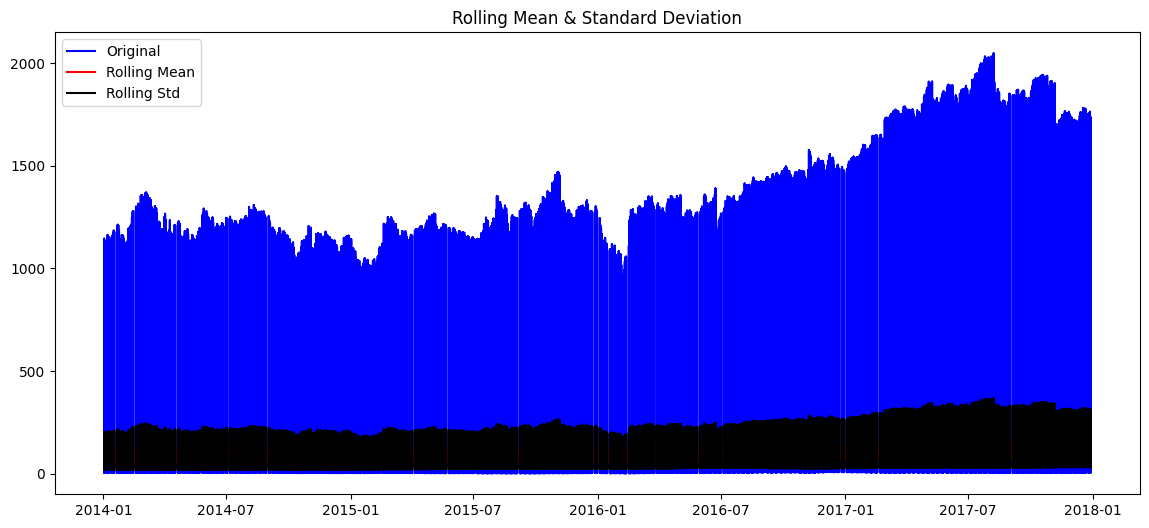

In [45]:
# Plot rolling mean & std
rolmean = ts.rolling(30).mean()
rolstd = ts.rolling(30).std()

plt.figure(figsize=(14,6))
plt.plot(ts, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


### Step 5 : Render the time series

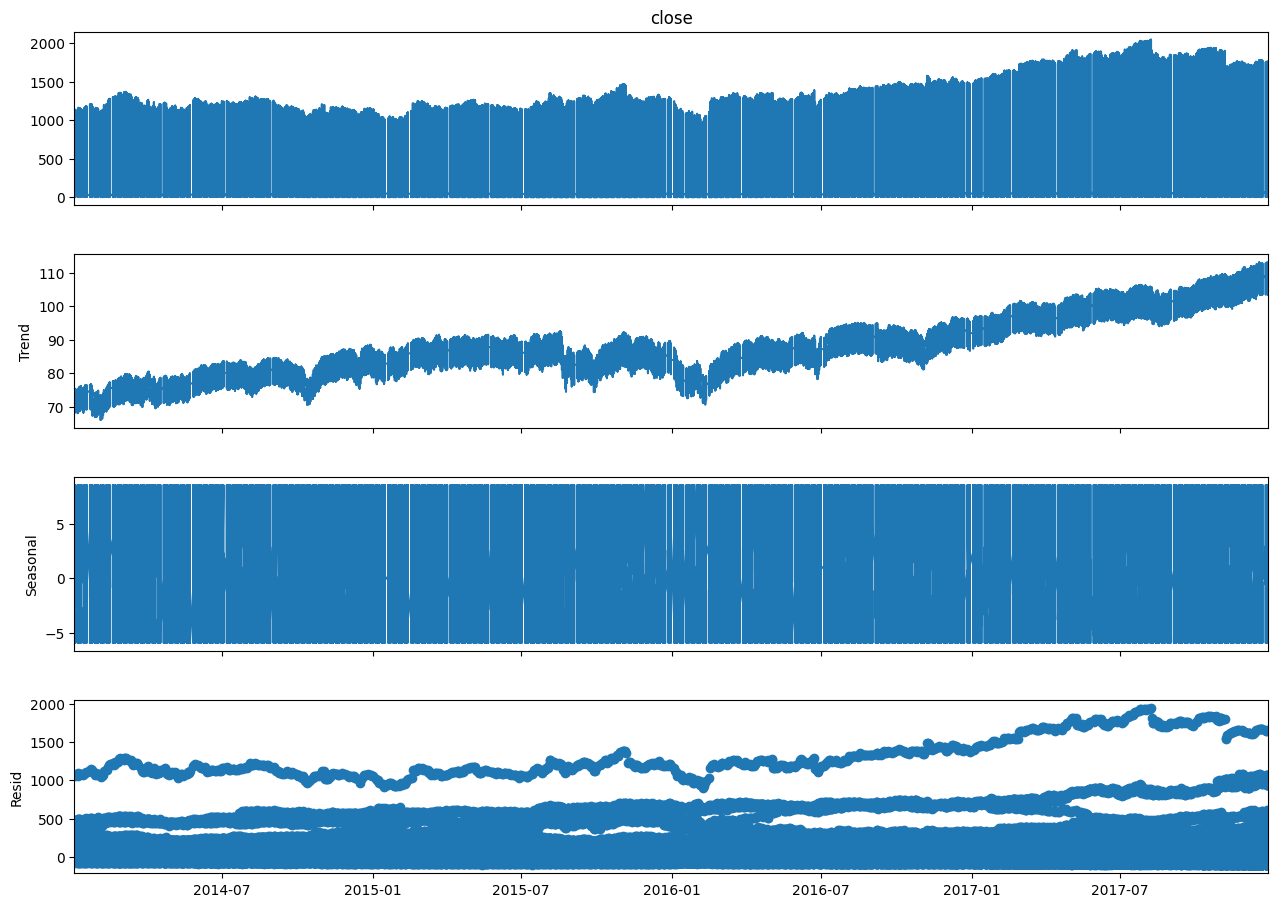

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

### Step 7 : Modeling

In [47]:
# Remove duplicate dates from the index
ts = ts[~ts.index.duplicated(keep='first')]

# Set the frequency of the time series to daily ('D')
ts = ts.asfreq('D')

In [48]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1458
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1385.804
Date:                Thu, 25 Sep 2025   AIC                           2783.608
Time:                        22:50:33   BIC                           2815.312
Sample:                    01-02-2014   HQIC                          2795.436
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0922      0.033     -2.803      0.005      -0.157      -0.028
ar.L2          0.0063      0.036      0.172      0.863      -0.065       0.078
ar.L3          0.1237      0.039      3.158      0.0

### Step 8: Forecast

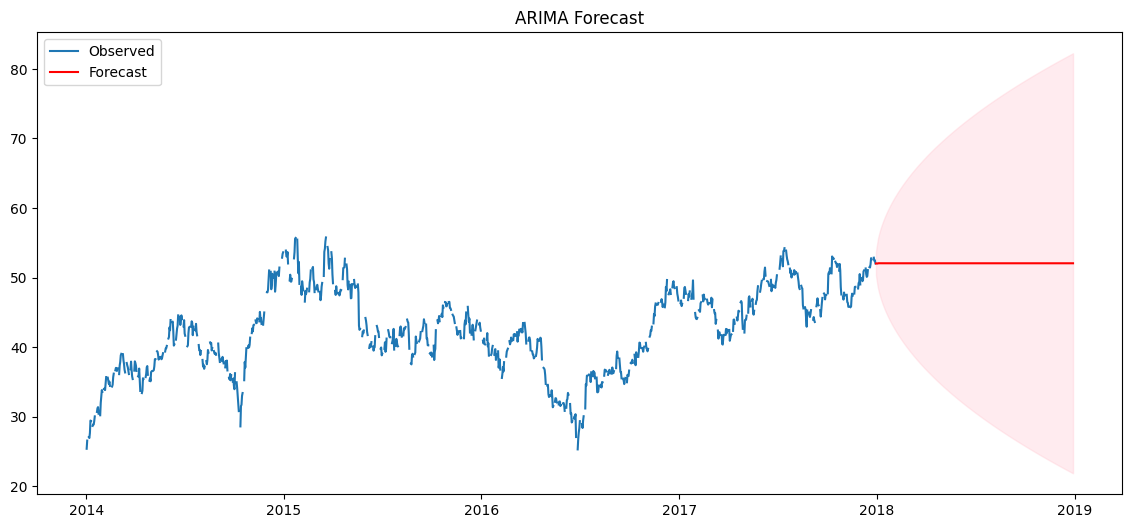

In [51]:
forecast = model_fit.get_forecast(steps=365)
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
plt.plot(ts, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA Forecast')
plt.show()
